# Welcome to the `rocketsled` quickstart!

*Note: This quickstart assumes a limited knowledge of FireWorks. If you already have a workflow built, see the examples or the more advanced tutorials.*

The easiest way to get started is to use rocketsled's `auto_setup`. `auto_setup` wraps any Python function in a FireWork, adds a Firework containing an OptTask optimization, and creates a workflow ready for launch. 

Let's get an optimization running on your local machine. First, make sure a `mongod` instance is running.

```bash
ardunn@ardmbp:$ mongod
```

### Define objective function

Great! Now lets define a trivial objective function f(x) for this demo. Your actual objective function will be **much** more complex than this.

In [2]:
# The objective function must accept a vector and return a scalar.
def f(x):
    return x[0] * x[1] / x[2]

### Define constraints

Let's constrain this function in each of it's dimensions in the format rocketsled uses. Each dimension is represented as a 2-tuple for (low, high), and is placed in a list. So if we want to constrain x1 to integers between 1-100, x2 to integers between 200-300, and x3 to floats between 5.0-10.0,

In [3]:
dimensions = [(1, 100), (200, 300), (5.0, 10.0)]

These constraints ensure the function has a maximum value of 6000. 

### Using `auto_setup` on a function

Now we can use `auto_setup` to write a file which will
1. Define a workflow creator
2. Be able to launch Fireworks right away.


Let's now write a script that will maximize our objective function using the default predictor, based on scikit-learn's RandomForestRegressor. 

In [ ]:
from rocketsled import auto_setup

# Define the db where the LaunchPad and optimization data will be stored
# The 'opt_label' field defines the 
dbinfo = {"host": "localhost", "name": "my_db", "port": 27017, "opt_label": "quickstart"}

if __name__ == "__main__":
    auto_setup(f, dimensions, wfname="quickstart", **dbinfo, max=True)

```
File successfully created!
Find your auto sled at /Users/ardunn/alex/rocketsled/rocketsled/auto_sleds/quickstart.py
```

### Check out and run the auto sled

Let's go to this directory and look at the file, which will look similar to this:

In [ ]:
from __future__ import unicode_literals
"""
This is an automatically created script from auto_setup.
If you are not comfortable working with FireWorks and PyTask, do NOT move this
file out this directory or rename it if you want to run this workflow!

If you are comfortable working with FireWorks and PyTask, feel free to edit
and/or move this file to suit your needs. See the OptTask documentation and the
examples for more information on setting up workflow creators.
"""
from fireworks import PyTask, Firework, Workflow, LaunchPad
from fireworks.core.rocket_launcher import rapidfire
from rocketsled.utils import deserialize, random_guess
from rocketsled import OptTask


# This is your function, imported to rocketsled to use with PyTask.
f = deserialize('/Users/ardunn/quickstart.f')

def wf_creator(x):
    spec = {'_x_opt':x}
    pt = PyTask(func='rocketsled.auto_sleds.quickstart.f', args=[x], outputs=['_y_opt'])
    ot = OptTask(opt_label='quickstart', dimensions=[(1, 100), (200, 300), (5.0, 10.0)], wf_creator='rocketsled.auto_sleds.quickstart.wf_creator', host='localhost', port=27017, name='my_db')
    fw0 = Firework([pt], spec=spec, name='PyTaskFW')
    fw1 = Firework([ot], spec=spec, name='RocketsledFW')
    wf = Workflow([fw0, fw1], {fw0: [fw1], fw1: []}, name='quickstart @ ' + str(x))
    return wf


if __name__=='__main__': 

    # Make sure the launchpad below is correct, and make changes if necessary if
    # it does not match the OptTask db ^^^:
    lpad = LaunchPad(host='localhost', port=27017, name='my_db')
    # lpad.reset(password=None, require_password=False)

    # Define your workflow to start...
    wf1 = wf_creator(random_guess([(1, 100), (200, 300), (5.0, 10.0)]))

    # Add it to the launchpad and launch!
    lpad.add_wf(wf1)
    # rapidfire(lpad, nlaunches=5, sleep_time=0)

What rocketsled is doing here is fairly straightfoward. `wf_creator` returns a Workflow containing your objective function Firework and the optimization Firework. Then it adds it to the launchpad and launches it!

Uncomment the `lpad.reset` line if necessary (i.e., if this database is not already a FireWorks db or you don't mind resetting it). Uncomment the last line if you'd like to launch right away! Let's change nlaunches to 100, to run the first 100 Fireworks (50 optimization loops). 

In [ ]:
rapidfire(lpad, nlaunches=100, sleep_time=0)

Running this file will produce the following:


```
2018-03-09 23:02:02,147 INFO Created new dir /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-02-146629
2018-03-09 23:02:02,147 INFO Launching Rocket
2018-03-09 23:02:02,396 INFO RUNNING fw_id: 2 in directory: /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-02-146629
2018-03-09 23:02:02,404 INFO Task started: PyTask.
2018-03-09 23:02:02,406 INFO Task completed: PyTask 
2018-03-09 23:02:02,417 INFO Rocket finished
2018-03-09 23:02:02,420 INFO Created new dir /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-02-419051
2018-03-09 23:02:02,420 INFO Launching Rocket
2018-03-09 23:02:02,428 INFO RUNNING fw_id: 1 in directory: /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-02-419051
2018-03-09 23:02:02,432 INFO Task started: {{rocketsled.opt.OptTask}}.
...
2018-03-09 23:02:22,843 INFO RUNNING fw_id: 100 in directory: /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-22-834335
2018-03-09 23:02:22,847 INFO Task started: PyTask.
2018-03-09 23:02:22,847 INFO Task completed: PyTask 
2018-03-09 23:02:22,856 INFO Rocket finished
2018-03-09 23:02:22,858 INFO Created new dir /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-22-858023
2018-03-09 23:02:22,858 INFO Launching Rocket
2018-03-09 23:02:22,866 INFO RUNNING fw_id: 99 in directory: /Users/ardunn/alex/lbl/projects/rocketsled/code/rocketsled/rocketsled/auto_sleds/launcher_2018-03-10-07-02-22-858023
2018-03-09 23:02:22,870 INFO Task started: {{rocketsled.opt.OptTask}}.
2018-03-09 23:02:23,279 INFO Added a workflow. id_map: {-100: 101, -99: 102}
2018-03-09 23:02:23,280 INFO Task completed: {{rocketsled.opt.OptTask}} 
2018-03-09 23:02:23,289 INFO Rocket finished
```


### Visualize the optimization results

Rocketsled comes with a simple function for creating a matplotlib optimization plot. 

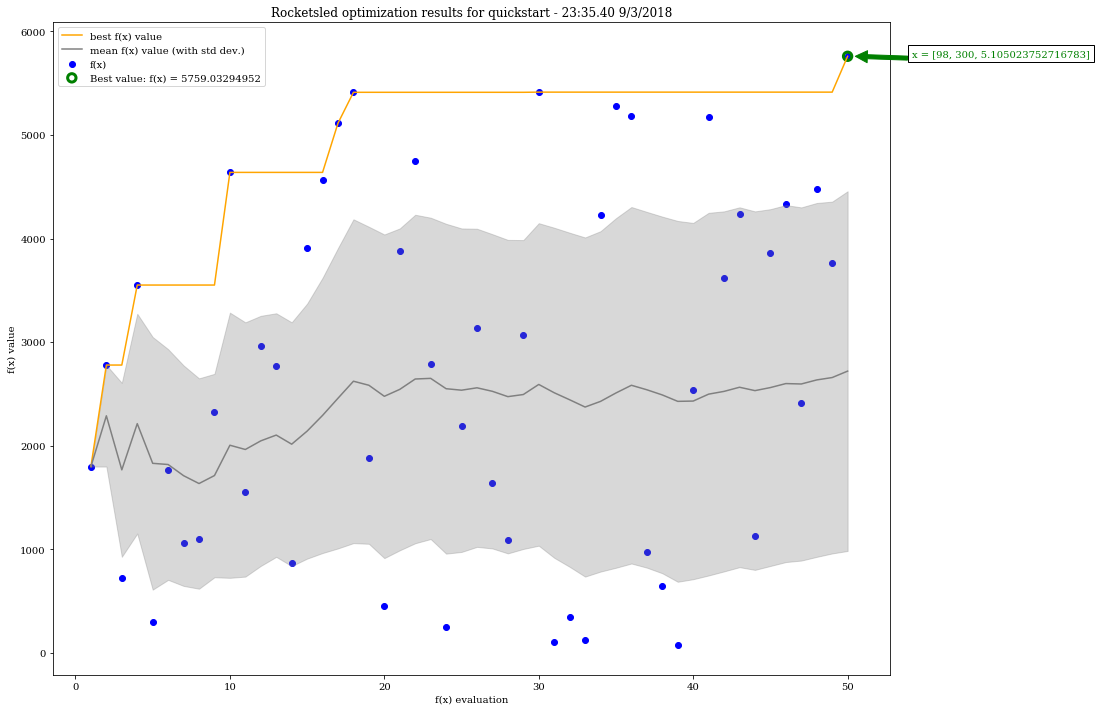

In [9]:
%matplotlib inline
from rocketsled import visualize
from fireworks import LaunchPad
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 12)
lp = LaunchPad(host='localhost', port=27017, name='my_db')
visualize(lp.db.quickstart, maximize=True)

The best found value is shown in green. 
You should find that the maximum is 90-99% of the true maximum, 6,000. 